# 航空宇宙情報システム学第二： 7月11日課題 (HW2023-06)

<font color="red"> 提出期限: 8月9日(水) </font>

この授業の最終課題になります。何が良いか色々と考えたのですが、授業で扱った話題を割とトータルで扱いつつ、航空宇宙らしい題材として、**剛体の3次元回転運動をシミュレーションし、得られたデータから慣性モーメントを最小二乗法で推定する** ということをやってみたいと思います。

まず、剛体の回転運動ですが、慣性主軸を座標系に一致させた場合、オイラーの方程式は運動方程式は以下のように表されました。

$$
\begin{align}
I_{x} \dot{\omega}_x - (I_{y}-I_{z}) \omega_y \omega_z &= N_x \\
I_{y} \dot{\omega}_y - (I_{z}-I_{x}) \omega_z \omega_x &= N_y \\
I_{z} \dot{\omega}_z - (I_{x}-I_{y}) \omega_x \omega_y &= N_z
\end{align}
$$

## 課題1

外力によるトルクは考えないことにします($N_x = N_y = N_z = 0$)。このとき、以下のケースについて、オイラーの方程式を数値的に解き、姿勢角速度$\omega_x,\omega_y,\omega_z$ の時間変化をプロットしてください。
いずれのケースでも、角速度の初期値は、$\omega_x(0)=\omega_y(0)=0.2, \omega_z(0)=0.5$ とし、時刻$t=0$から$t=20$(sec)までの運動をシミュレートするとします。
<font color="blue">
常微分方程式のソルバーは、自分でRunge-Kutta法を実装して使っても良いですし、SciPyの`scipy.integrate.solve_ivp()` 関数を使っても良い</font>です。

### (ケース 1)
慣性主軸に関する慣性モーメントが
$I_x = 10$, $I_y= 15$, $I_z=20$の場合。

### (ケース 2)
$I_x = I_y= 15$, $I_z=20$の場合。

### (ケース 3)
$I_x = I_y = I_z= 15$の場合。



____

ソルバーとしてScipyを用いた場合

In [ ]:
!pip install scipy
!pip install matplotlib
!pip install pandas

In [ ]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import numpy as np
import sympy

In [ ]:
def func(t, u, Ix, Iy, Iz):
    wx, wy, wz = u

    dwxdt = (Iy - Iz) * wy * wz / Ix
    dwydt = (Iz - Ix) * wz * wx / Iy
    dwzdt = (Ix - Iy) * wx * wy / Iz

    return np.array([dwxdt, dwydt, dwzdt])

In [ ]:
lst = ["x", "y", "z"]
init   = [0.2, 0.2, 0.5]
t_span = [0.0,20.0]
t_eval = np.linspace(*t_span,100) # time for sampling

In [ ]:
def solve(Ix, Iy, Iz):
  sol = solve_ivp(func,t_span,init,method='RK45',t_eval=t_eval, args = (Ix, Iy, Iz))
  return sol

ケース1

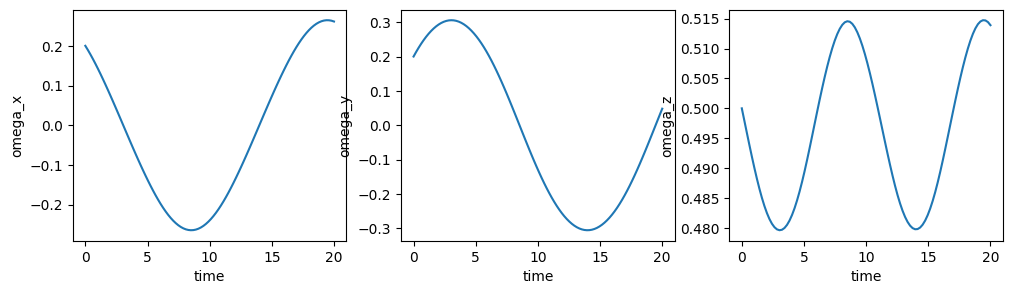

In [ ]:
sol = solve(10, 15, 20)
fig = plt.figure(figsize = [12, 3])
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.plot(sol.t, sol.y[i,:])
  ax.set_xlabel("time")
  ax.set_ylabel(f"omega_{lst[i]}")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(sol.y, columns=t_eval, index=["w_x", "w_y", "w_z"])
data

,0.000000,0.202020,0.404040,0.606061,0.808081,1.010101,1.212121,1.414141,1.616162,1.818182,...,18.181818,18.383838,18.585859,18.787879,18.989899,19.191919,19.393939,19.595960,19.797980,20.000000
w_x,0.2,0.189587,0.178577,0.167017,0.15495,0.142422,0.129477,0.116158,0.102512,0.088585,...,0.245561,0.250969,0.255502,0.259137,0.261850,0.263620,0.264440,0.264307,0.263222,0.261191
w_y,0.2,0.213094,0.225418,0.236940,0.24763,0.257465,0.266423,0.274486,0.281648,0.287909,...,-0.113473,-0.096399,-0.078937,-0.061154,-0.043123,-0.024917,-0.006610,0.011723,0.030009,0.048173
w_z,0.5,0.497967,0.495928,0.493910,0.49194,0.490043,0.488244,0.486566,0.485032,0.483664,...,0.510003,0.511325,0.512457,0.513382,0.514080,0.514534,0.514745,0.514711,0.514432,0.513915


ケース2

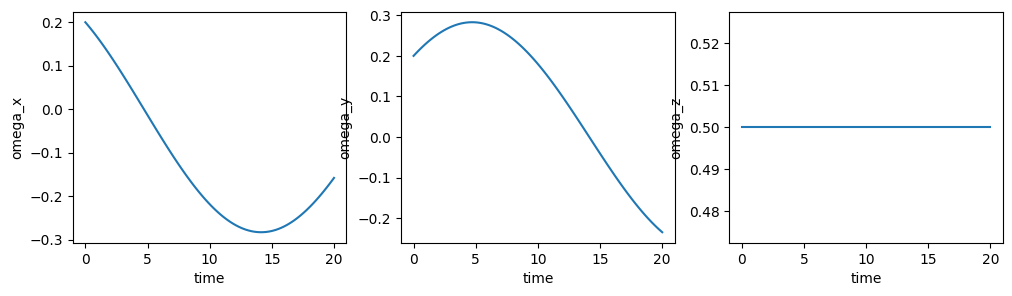

In [ ]:
sol = solve(15, 15, 20)
fig = plt.figure(figsize = [12, 3])
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.plot(sol.t, sol.y[i,:])
  ax.set_xlabel("time")
  ax.set_ylabel(f"omega_{lst[i]}")
plt.show()

ケース3

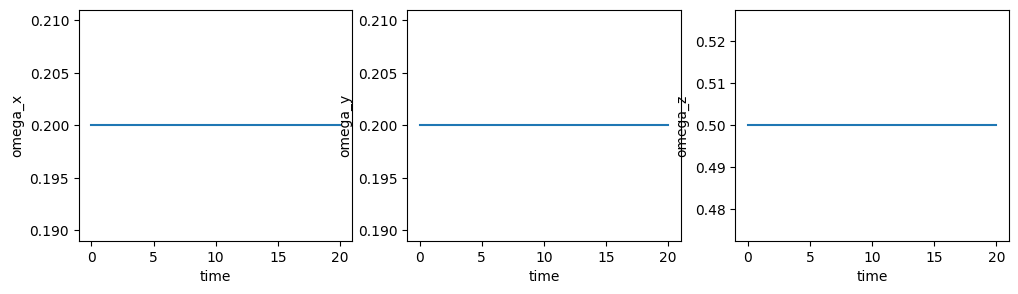

In [ ]:
sol = solve(15, 15, 15)
fig = plt.figure(figsize = [12, 3])
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.plot(sol.t, sol.y[i,:])
  ax.set_xlabel("time")
  ax.set_ylabel(f"omega_{lst[i]}")
plt.show()

___

## 課題2

課題1 の (ケース1)のシミュレーションで得られた角速度$\omega_x,\omega_y,\omega_z$の時間履歴データから、この剛体の慣性モーメントのうち、$I_y$,$I_z$を最小二乗法によって推定してください。<font color="blue">$I_x=10$は既知である</font>とします。推定する$I_y$, $I_z$の初期値も$10$としてください。
この問題も、<font color="blue">自分で勾配法、準ニュートン法などの関数最小化、Gauss-Newton法、Levenberg-Marquardt法などの非線形最小二乗法のソルバーを実装して解いてもらっても良いですし、SciPyの`optimize.minize()`関数、`optimize.least_squares()`関数を使っても良い</font>です。

**(ヒント)**
オイラーの運動方程式は、
$$
\dot{\boldsymbol{\omega}} = \boldsymbol{f}(\boldsymbol{\omega},\boldsymbol{\alpha})
$$
の形式で表されます。ここで、$\boldsymbol{\omega}=[\omega_x,\omega_y,\omega_z]$ , $\boldsymbol{\alpha}=[I_y,I_z]$ です。時間刻み幅を$\Delta t$として、1次近似の差分方程式を考えると、
$$
\boldsymbol{\omega}_{k+1} \approx \boldsymbol{\omega}_{k}
+ \Delta t \cdot \boldsymbol{f}(\boldsymbol{\omega}_k,\boldsymbol{\alpha})
$$
書き換えると、
$$
\frac{\boldsymbol{\omega}_{k+1} - \boldsymbol{\omega}_{k}}{\Delta t} \approx \boldsymbol{f}(\boldsymbol{\omega}_k,\boldsymbol{\alpha})
$$
となるので、$\boldsymbol{y}_k \equiv \frac{\boldsymbol{\omega}_{k+1} - \boldsymbol{\omega}_{k}}{\Delta t}$,
$\boldsymbol{x}_k \equiv \boldsymbol{\omega}_{k}$
とすれば、
$$
\boldsymbol{y}_k \approx \boldsymbol{f}(\boldsymbol{x}_k,\boldsymbol{\alpha})
$$
という形になり、データ $\{ \boldsymbol{x}_k, \boldsymbol{y}_k \}$ ($k=0,1,\cdots,n-1$) に対して、残差二乗和は、
$$
Q(\boldsymbol{\alpha}) = \sum_{i=0}^{n-1} \Vert \boldsymbol{y}_k - \boldsymbol{f}(\boldsymbol{x}_k,\boldsymbol{\alpha}) \Vert^2
$$
となるので、これを最小化する$\hat{\boldsymbol{\alpha}}=[\hat{I}_y, \hat{I}_z]$を求めるということです。

____

In [ ]:
from numpy import linalg as la
from scipy import optimize

In [ ]:
data

,0.000000,0.202020,0.404040,0.606061,0.808081,1.010101,1.212121,1.414141,1.616162,1.818182,...,18.181818,18.383838,18.585859,18.787879,18.989899,19.191919,19.393939,19.595960,19.797980,20.000000
w_x,0.2,0.189587,0.178577,0.167017,0.15495,0.142422,0.129477,0.116158,0.102512,0.088585,...,0.245561,0.250969,0.255502,0.259137,0.261850,0.263620,0.264440,0.264307,0.263222,0.261191
w_y,0.2,0.213094,0.225418,0.236940,0.24763,0.257465,0.266423,0.274486,0.281648,0.287909,...,-0.113473,-0.096399,-0.078937,-0.061154,-0.043123,-0.024917,-0.006610,0.011723,0.030009,0.048173
w_z,0.5,0.497967,0.495928,0.493910,0.49194,0.490043,0.488244,0.486566,0.485032,0.483664,...,0.510003,0.511325,0.512457,0.513382,0.514080,0.514534,0.514745,0.514711,0.514432,0.513915


In [ ]:
def func_from_data(data, Ix, Iy, Iz):
  # I = np.array([[Ix,0,0],
  #               [0,Iy,0],
  #               [0,0,Iz]])
  # w_dot = - np.dot(la.inv(I), np.cross(w, np.dot(I, w)))
  lst = []
  for i in range(len(t_eval)-1):
    val = ([(Iy - Iz) * data[t_eval[i]][1] * data[t_eval[i]][2] / Ix,
     (Iz - Ix) * data[t_eval[i]][2] * data[t_eval[i]][0] / Iy,
      (Ix - Iy) * data[t_eval[i]][0] * data[t_eval[i]][1] / Iz])
    lst.append(val)
  return np.array(lst).T

In [ ]:
def culc_y(data):
  lst = []
  for i in range(len(t_eval)-1):
    y = (data[t_eval[i+1]] - data[t_eval[i]]) / (t_eval[i+1] - t_eval[i])
    lst.append(y)
  return np.array(lst).T
y = culc_y(data)
la.norm(y[:,0])**2

0.006959624818946715

In [ ]:
def fit_func(par):
    Ix = 10.
    Iy = par[0]
    Iz = par[1]
    return y - func_from_data(data, Ix, Iy, Iz)

In [ ]:
def sse(par):
  ans=0
  for i in range(len(t_eval)-1):
    ans += la.norm(fit_func(par)[:,i])**2
  return ans

In [ ]:
par0 = [10.,10.]
result = optimize.minimize(sse, par0)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0005847272612453674
        x: [ 1.504e+01  2.003e+01]
      nit: 19
      jac: [-5.192e-07  1.382e-06]
 hess_inv: [[ 9.987e+02  9.148e+02]
            [ 9.148e+02  8.697e+02]]
     nfev: 63
     njev: 21

In [ ]:
Iy_fit=result.x[0]
Iz_fit=result.x[1]
SSE = result.fun
print(f"I_y:{Iy_fit} \nI_z:{Iz_fit} \nSSE:{SSE}")

I_y:15.035744523593435 
I_z:20.02984410145299 
SSE:0.0005847272612453674


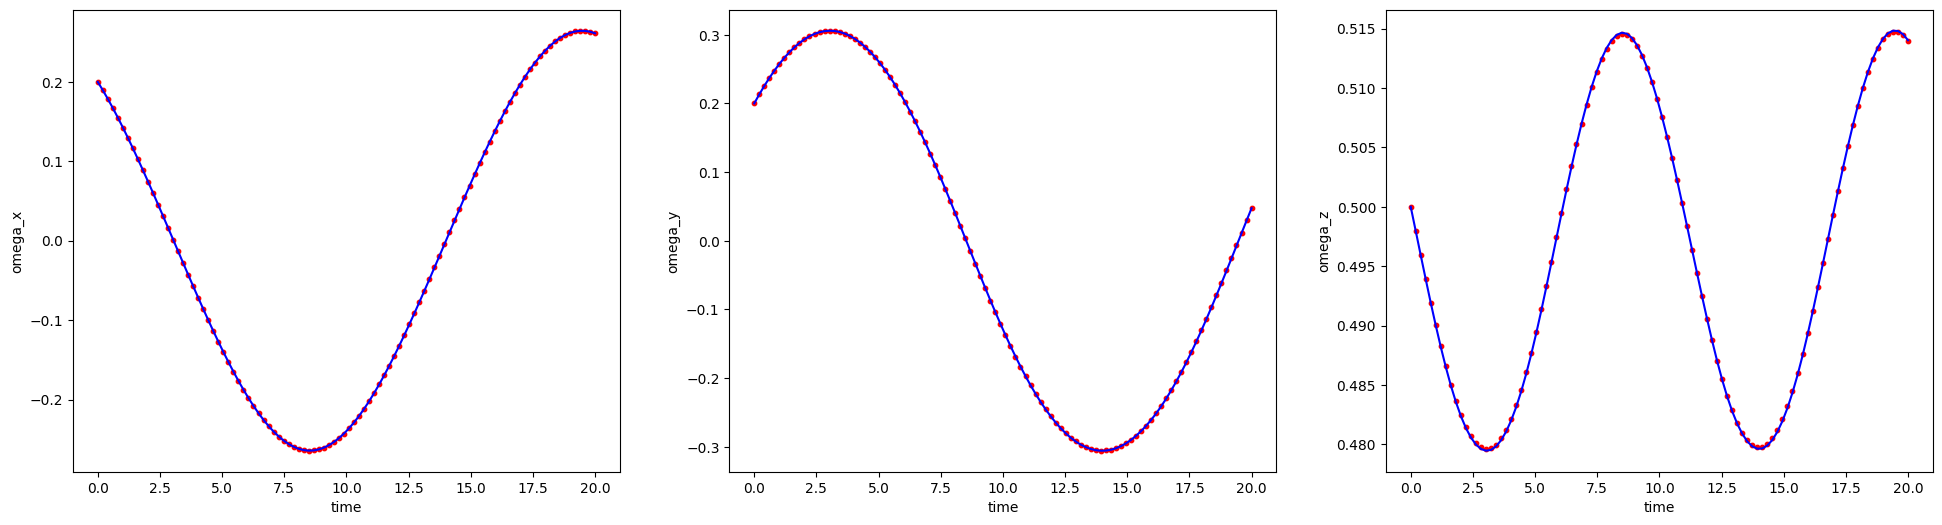

In [ ]:
sol = solve(10, Iy_fit, Iz_fit)
fig = plt.figure(figsize = [24, 6])
for i in range(3):
  ax = fig.add_subplot(1,3,i+1)
  ax.plot(sol.t, sol.y[i,:], color = "b")
  ax.scatter(data.columns, data.iloc[i], color = "r", s = 10)
  ax.set_xlabel("time")
  ax.set_ylabel(f"omega_{lst[i]}")
plt.show()

In [ ]:

# par0 = [10., 10.]
# result = optimize.least_squares(fit_func, par0, method = "lm")
# Ix_fit=result[0][0]
# Iy_fit=result[0][1]
# Iz_fit=result[0][2]
# print(Ix_fit, Iy_fit, Iz_fit)

#PLot
# plt.figure(figsize=(8,5))
# plt.plot(x_csv,y_csv,'bo', label='Exp.')
# plt.plot(x_csv,a_fit*x_csv**2+b_fit*x_csv+c_fit,'k-', label='fitted parabora', linewidth=10, alpha=0.3)
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show()

In [ ]:
# # 正則化の強さ
# lmd = 2.0
# # 反復計算の履歴を残すためのリスト
# hist_sq = []
# # パラメータ推定値の初期値を設定
# alp = np.array([1.,0.,0.5,0.5])
# # 収束判定のため
# res = np.ones(len(ti))
# for it in range(30):
#     # 現在のパラメータでyを予測
#     res,respre = y - func(ti,alp),res
#     # 残差二乗和
#     sq = np.vdot(res,res)
#     hist_sq.append(sq)
#     print('sum of squared residuals: {}'.format(sq))
#     J = Jacobian(ti,alp)
#     # 一種の正則化
#     H = np.dot(J.T,J)+lmd*np.eye(len(alp))
#     dlta = la.solve(H,np.dot(J.T,res))
#     alp += dlta
#     print(alp)
#     # 前回からの差分
#     dif = res - respre
#     if np.vdot(dif,dif) < 1.0e-6:
#         print('Converged')
#         break
# # 回帰結果を使って再推定
# yhat = func(ti,alp)
# plt.plot(ti,y,'o')
# plt.plot(ti,yhat,'r-')